# GemPy Workshop

## Installation

0. https://docs.conda.io/en/latest/miniconda.html
1. Open conda prompt (Windows) or terminal (Linux/MacOS)
2. `$ conda create --name gu python==3.7.5`
0. Activate enviromet: `$ conda activate gu`
0. Installing gemgis: https://github.com/cgre-aachen/gemgis#installation
3. Installing gempy: https://docs.gempy.org/installation.html
4. clone the repo:
    `git clone https://github.com/cgre-aachen/gempy_workshops.git`
0. `$ conda install jupyter notebook`
5. `$ jupyter notebook`


## Subsurface: Centralizing data management for the GeoScientific Stack  

In [1]:
import pooch
from striplog import Component

In [2]:
import subsurface as sb
from subsurface.reader import ReaderFilesHelper
from subsurface.reader.wells import read_collar, read_lith, read_survey, WellyToSubsurfaceHelper, welly_to_subsurface

Reading csv into pandas:

In [3]:
base_url = "https://raw.githubusercontent.com/softwareunderground/subsurface/main/tests/data/borehole/"

raw_borehole_data_csv = pooch.retrieve(url=base_url + 'kim_ready.csv',
                                       known_hash="efa90898bb435daa15912ca6f3e08cd3285311923a36dbc697d2aafebbafa25f")

collar = read_collar(
    ReaderFilesHelper(
        file_or_buffer=raw_borehole_data_csv,
        index_col="name",
        usecols=['x', 'y', 'altitude', "name"]
    )
)

collar

,x,y,altitude
name,,,
KCL12,303412,3913997,108.713287
KCL12,303412,3913997,108.713287
KCL12,303412,3913997,108.713287
KCL12,303412,3913997,108.713287
KCL12,303412,3913997,108.713287
...,...,...,...
USLXX,318982,3935253,227.418152
USLXX,318982,3935253,227.418152
USLXX,318982,3935253,227.418152


In [4]:
survey = read_survey(
    ReaderFilesHelper(
        file_or_buffer=raw_borehole_data_csv,
        index_col="name",
        usecols=["name", "md"]
    )
)

survey

/home/miguel/PycharmProjects/subsurface/subsurface/reader/wells/well_files_reader.py:132: UserWarning: inc and/or azi columns are not present in the file. The boreholes will be straight.
  warnings.warn('inc and/or azi columns are not present in the file.'


,md,inc,azi
name,,,
KCL12,0.000000,0,0
KCL12,1035.597076,0,0
KCL12,1652.245636,0,0
KCL12,2109.993683,0,0
KCL12,2109.984893,0,0
...,...,...,...
USLXX,308.885376,0,0
USLXX,601.202972,0,0
USLXX,753.114075,0,0


In [5]:
lith = read_lith(
    ReaderFilesHelper(
        file_or_buffer=raw_borehole_data_csv,
        usecols=['name', 'top', 'base', 'formation'],
        columns_map={'top': 'top',
                     'base': 'base',
                     'formation': 'component lith',
                     }
    )
)

lith


,top,base,component lith
name,,,
KCL12,0.000000,1035.597076,topo
KCL12,1035.597076,1652.245636,etchegoin
KCL12,1652.245636,2109.993683,macoma
KCL12,2109.993683,2110.003683,mclure
KCL12,2109.984893,2799.027984,fruitvale
...,...,...,...
USLXX,308.885376,601.202972,freeman_jewett
USLXX,601.202972,753.114075,vedder
USLXX,753.114075,1197.413513,cretaceous


### Welly

In [6]:
wts = WellyToSubsurfaceHelper(collar_df=collar, survey_df=survey, lith_df=lith)


The following striplog failed being processed:  []


In [7]:
wts.p.df()

lith_log
UWI     Depth                
KCL15   121.489862          1
        364.469586          1
        607.449310          1
        850.429033          9
        1093.408757         6
...                       ...
Davies1 1180.115872         4
        1394.682394         5
        1609.248917         2
        1823.815439         2
        2038.381961         3

[721 rows x 1 columns]

In [8]:
stripLog = wts.p[0].data['lith']
stripLog

Striplog(11 Intervals, start=0.0, stop=2672.7869621)

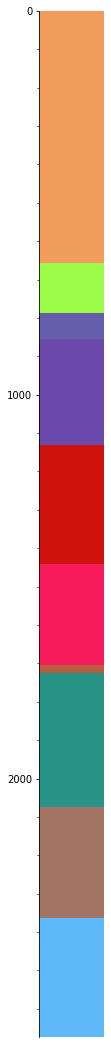

In [9]:
stripLog.plot()

In [10]:
stripLog[0]

Interval({'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}), 'base': Position({'middle': 657.0032806, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lith': 'topo'})]})

In [11]:
stripLog[0].base.middle


657.0032806

In [12]:
welly_well = wts.p[0].data["lith_log"]
welly_well

Curve([1, 1, 1, 9, 6, 3, 7, 2, 2, 5, 4])

### Subsurface

In [13]:
formations = ["topo", "etchegoin", "macoma", "chanac", "mclure",
              "santa_margarita", "fruitvale",
              "round_mountain", "olcese", "freeman_jewett", "vedder", "eocene",
              "cretaceous",
              "basement", "null"]

unstruct = welly_to_subsurface(wts, table=[Component({'lith': l}) for l in formations])
element = sb.LineSet(unstruct)
pyvista_mesh = sb.visualization.to_pyvista_line(element, radius=50)

# Plot default LITH
interactive_plot =sb.visualization.pv_plot([pyvista_mesh], background_plotter=True)

The following boreholes failed being processed:  []


In [14]:
unstruct

<xarray.Dataset>
Dimensions:       (XYZ: 3, cell: 3283, cell_attr: 1, nodes: 2, points: 3350, vertex_attr: 0)
Coordinates:
  * points        (points) int64 0 1 2 3 4 5 6 ... 3344 3345 3346 3347 3348 3349
  * XYZ           (XYZ) <U1 'X' 'Y' 'Z'
  * cell_attr     (cell_attr) object 'lith_log'
  * vertex_attr   (vertex_attr) int64 
    UWI           (cell) object 'KCL15' 'KCL15' 'KCL15' ... 'Davies1' 'Davies1'
    Depth         (cell) float64 27.27 81.82 136.4 ... 2.08e+03 2.124e+03
Dimensions without coordinates: cell, nodes
Data variables:
    vertex        (points, XYZ) float64 3.136e+05 3.921e+06 ... -1.871e+03
    cells         (cell, nodes) int64 0 1 1 2 2 3 ... 3347 3347 3348 3348 3349
    cell_attrs    (cell, cell_attr) int64 1 1 1 1 1 1 1 ... 14 14 14 14 14 14 14
    vertex_attrs  (points, vertex_attr) float64 

In [15]:
unstruct.data["cells"]

<xarray.DataArray 'cells' (cell: 3283, nodes: 2)>
array([[   0,    1],
       [   1,    2],
       [   2,    3],
       ...,
       [3346, 3347],
       [3347, 3348],
       [3348, 3349]])
Coordinates:
    UWI      (cell) object 'KCL15' 'KCL15' 'KCL15' ... 'Davies1' 'Davies1'
    Depth    (cell) float64 27.27 81.82 136.4 ... 2.036e+03 2.08e+03 2.124e+03
Dimensions without coordinates: cell, nodes

In [17]:
unstruct.data["vertex"]

<xarray.DataArray 'vertex' (points: 3350, XYZ: 3)>
array([[ 3.13624000e+05,  3.92077100e+06,  1.32526718e+02],
       [ 3.13624000e+05,  3.92077100e+06,  7.79802495e+01],
       [ 3.13624000e+05,  3.92077100e+06,  2.34337809e+01],
       ...,
       [ 3.13907000e+05,  3.93322400e+06, -1.78371358e+03],
       [ 3.13907000e+05,  3.93322400e+06, -1.82750266e+03],
       [ 3.13907000e+05,  3.93322400e+06, -1.87129175e+03]])
Coordinates:
  * points   (points) int64 0 1 2 3 4 5 6 ... 3343 3344 3345 3346 3347 3348 3349
  * XYZ      (XYZ) <U1 'X' 'Y' 'Z'

In [18]:
unstruct.data.cell_attrs

<xarray.DataArray 'cell_attrs' (cell: 3283, cell_attr: 1)>
array([[ 1],
       [ 1],
       [ 1],
       ...,
       [14],
       [14],
       [14]])
Coordinates:
  * cell_attr  (cell_attr) object 'lith_log'
    UWI        (cell) object 'KCL15' 'KCL15' 'KCL15' ... 'Davies1' 'Davies1'
    Depth      (cell) float64 27.27 81.82 136.4 ... 2.036e+03 2.08e+03 2.124e+03
Dimensions without coordinates: cell

## Finding the boreholes bases

In [19]:
cells_attr = unstruct.data.cell_attrs
cells = unstruct.data.cells
vertex = unstruct.data.vertex

In [20]:
bool_prop_change = cells_attr.values[1:] != cells_attr.values[:-1]

In [21]:
import numpy as np
args_prop_change = np.where(bool_prop_change)[0]
args_prop_change

array([  11,   13,   15,   20,   25,   30,   31,   37,   42,   48,   56,
         66,   69,   75,   76,   80,   84,   91,   97,  110,  122,  128,
        131,  133,  134,  138,  146,  157,  171,  176,  178,  182,  187,
        188,  194,  195,  207,  212,  216,  221,  229,  235,  244,  254,
        266,  269,  271,  273,  275,  278,  280,  284,  293,  305,  313,
        316,  317,  320,  321,  325,  330,  336,  342,  353,  366,  371,
        373,  378,  382,  383,  384,  389,  391,  404,  406,  408,  413,
        418,  423,  424,  431,  435,  440,  452,  464,  467,  470,  471,
        473,  475,  477,  482,  489,  503,  505,  511,  513,  518,  525,
        531,  538,  551,  564,  571,  572,  579,  582,  585,  587,  596,
        610,  613,  614,  617,  618,  622,  627,  634,  636,  645,  653,
        655,  658,  661,  662,  665,  670,  676,  685,  699,  709,  716,
        719,  721,  724,  727,  730,  734,  749,  758,  765,  766,  775,
        779,  781,  783,  797,  807,  812,  816,  8

In [22]:
vals_prop_change = cells_attr[args_prop_change]
vals_prop_change.to_pandas()

cell_attr,lith_log
cell,
0,1
1,2
2,3
3,4
4,6
...,...
590,6
591,9
592,10


In [23]:
vertex_args_prop_change = cells[args_prop_change, 1]

In [24]:
interface_points = vertex[vertex_args_prop_change]

In [25]:
interf_us= sb.UnstructuredData.from_array(vertex=interface_points.values, cells="points",
                                          cells_attr=vals_prop_change.to_pandas())

In [26]:
interf_us

<xarray.Dataset>
Dimensions:       (XYZ: 3, cell: 595, cell_attr: 1, nodes: 1, points: 595, vertex_attr: 0)
Coordinates:
  * points        (points) int64 0 1 2 3 4 5 6 7 ... 588 589 590 591 592 593 594
  * XYZ           (XYZ) <U1 'X' 'Y' 'Z'
  * cell_attr     (cell_attr) object 'lith_log'
  * vertex_attr   (vertex_attr) int64 
    cell_         (cell) int64 0 1 2 3 4 5 6 7 ... 588 589 590 591 592 593 594
Dimensions without coordinates: cell, nodes
Data variables:
    vertex        (points, XYZ) float64 3.136e+05 3.921e+06 ... -1.565e+03
    cells         (cell, nodes) int64 0 1 2 3 4 5 6 ... 589 590 591 592 593 594
    cell_attrs    (cell, cell_attr) int64 1 2 3 4 6 9 10 11 ... 1 4 6 9 10 11 13
    vertex_attrs  (points, vertex_attr) float64 

In [27]:
element = sb.PointSet(interf_us)
pyvista_mesh = sb.visualization.to_pyvista_points(element)


In [28]:
interactive_plot.add_mesh(pyvista_mesh)

(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f98dbcddf40

In [29]:
interface_points

<xarray.DataArray 'vertex' (cell: 595, XYZ: 3)>
array([[ 3.13624000e+05,  3.92077100e+06, -5.22030905e+02],
       [ 3.13624000e+05,  3.92077100e+06, -6.31123843e+02],
       [ 3.13624000e+05,  3.92077100e+06, -7.40216780e+02],
       ...,
       [ 3.13907000e+05,  3.93322400e+06, -9.07931852e+02],
       [ 3.13907000e+05,  3.93322400e+06, -1.12687728e+03],
       [ 3.13907000e+05,  3.93322400e+06, -1.56476814e+03]])
Coordinates:
    points   (cell) int64 12 14 16 21 26 31 32 ... 3316 3318 3322 3327 3332 3342
  * XYZ      (XYZ) <U1 'X' 'Y' 'Z'
    UWI      (cell) object 'KCL15' 'KCL15' 'KCL15' ... 'Davies1' 'Davies1'
    Depth    (cell) float64 627.3 736.4 845.5 ... 1.16e+03 1.379e+03 1.817e+03
Dimensions without coordinates: cell

## GemPy: Initialize model

The first step to create a GemPy model is create a `gempy.Model` object that will
contain all the other data structures and necessary functionality. In addition
 for this example we will define a *regular grid* since the beginning.
This is the grid where we will interpolate the 3D geological model.

GemPy is based on a **meshless interpolator**. In practice this means that we can
interpolate any point in a 3D space. However, for convenience, we have built some
standard grids for different purposes. At the current day the standard grids are:

- **Regular grid**: default grid mainly for general visualization
- **Custom grid**: GemPy's wrapper to interpolate on a user grid
- **Topography**: Topographic data use to be of high density. Treating it as an independent
  grid allow for high resolution geological maps
- **Sections**: If we predefine the section 2D grid we can directly interpolate at those
  locations for perfect, high resolution estimations
- **Center grids**: Half sphere grids around a given point at surface. This are specially tuned
  for geophysical forward computations

In [30]:
import gempy as gp

In [31]:
geo_model = gp.create_model("getting started")

In [32]:
geo_model.set_regular_grid(extent=[275619, 323824, 3914125, 3961793, -3972.6, 313.922], resolution=[50,50,50])

Active grids: ['regular']


Grid Object. Values: 
array([[ 2.76101050e+05,  3.91460168e+06, -3.92973478e+03],
       [ 2.76101050e+05,  3.91460168e+06, -3.84400434e+03],
       [ 2.76101050e+05,  3.91460168e+06, -3.75827390e+03],
       ...,
       [ 3.23341950e+05,  3.96131632e+06,  9.95959000e+01],
       [ 3.23341950e+05,  3.96131632e+06,  1.85326340e+02],
       [ 3.23341950e+05,  3.96131632e+06,  2.71056780e+02]])

GemPy core code is written in Python. However for efficiency and gradient based
machine learning most of heavy computations happen in optimize compile code,
 either C or CUDA for GPU.

To do so, GemPy rely on the library `Theano`. To guarantee maximum optimization
`Theano` requires to compile the code for every Python kernel. The compilation is
done by calling the following line at any point (before computing the model):

In [33]:
gp.set_interpolator(geo_model, theano_optimizer='fast_compile', verbose=[])


Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                            values
range                67928.893115
$C_o$            109865107.615631
drift equations               [3]


## First layer:

Grab from the `interf_us` the XYZ coordinates of the first layer:

In [34]:
import pandas as pd

In [35]:
def get_interface_coord_from_surfaces(surface_names: list, verbose=False):
    
    df = pd.DataFrame(columns=["X", "Y", "Z", "surface"])
    
    
    for e, surface_name in enumerate(surface_names):
        # The properties in subsurface start at 1
        val_property = e + 1
        # Find the cells with the surface id
        args_from_first_surface = np.where(vals_prop_change == val_property)[0]    
        if verbose: print(args_from_first_surface)
        # Find the vertex
        points_from_first_surface = interface_points[args_from_first_surface]
        if verbose: print(points_from_first_surface)
        
        # xarray.DataArray to pandas.DataFrame
        surface_pandas = points_from_first_surface.to_pandas()
        
        # Add formation column
        surface_pandas["surface"] = surface_name
        df = df.append(surface_pandas)
    
    return df.reset_index()

## Building the model

Now that we have the model initialize and the 2D and 3D render in place we can
 start the construction of the geological model. 

### Surfaces

GemPy is a surface based interpolator. This means that all the input data we add has to be refereed to a surface. The
 surfaces always mark the **bottom** of a unit. 
 
 By default GemPy surfaces are empty:

In [36]:
formations

['topo',
 'etchegoin',
 'macoma',
 'chanac',
 'mclure',
 'santa_margarita',
 'fruitvale',
 'round_mountain',
 'olcese',
 'freeman_jewett',
 'vedder',
 'eocene',
 'cretaceous',
 'basement',
 'null']

In [37]:
geo_model.add_surfaces(formations[:2])

,surface,series,order_surfaces,color,id
0,topo,Default series,1,#015482,1
1,etchegoin,Default series,2,#9f0052,2


In [38]:
gempy_surface_points = get_interface_coord_from_surfaces(["topo"])

In [39]:
gempy_surface_points

,index,X,Y,Z,surface
0,0,313624.0,3920771.0,-522.030905,topo
1,1,307338.0,3941223.0,-141.420325,topo
2,2,278958.0,3941643.0,-1205.675039,topo
3,3,293771.0,3925517.0,-793.344607,topo
4,4,320052.0,3924788.0,-240.035210,topo
...,...,...,...,...,...
61,61,305057.0,3926665.0,-784.109218,topo
62,62,301819.0,3917353.0,-934.128182,topo
63,63,301307.0,3956909.0,-523.732696,topo
64,64,295053.0,3933489.0,-801.368212,topo


In [40]:
geo_model.set_surface_points(gempy_surface_points, update_surfaces=False)
geo_model.update_to_interpolator()

True

/home/miguel/PycharmProjects/gempy/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


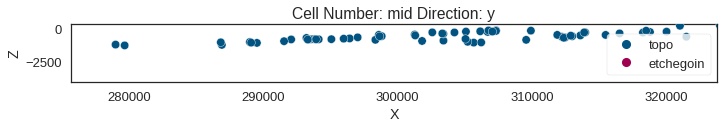

In [41]:
gp.plot.plot_2d(geo_model)

/home/miguel/PycharmProjects/gempy/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


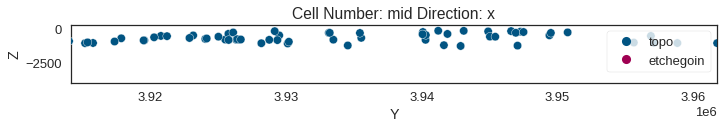

In [42]:
gp.plot.plot_2d(geo_model, direction="x")

The **minimum amount of input data** to interpolate anything in `gempy` is:

a) 2 surface points per surface

b) One orientation per series.

Lets add an orientation:

In [43]:
geo_model.add_orientations(X=300000, Y=3930000, Z=0, surface="topo", pole_vector=(0,0,1))

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,300000.0,3930000.0,0.0,0.0,0.0,1.0,0.01,topo


GemPy depends on multiple data objects to store all the data structures necessary
to construct an structural model. To keep all the necessary objects in sync the
class `gempy.ImplicitCoKriging` (which `geo_model` is instance of) will provide the
necessary methods to update these data structures coherently.

At current state (gempy 2.2), the data classes are:

- `gempy.SurfacePoints`
- `gempy.Orientations`
- `gempy.Surfaces`
- `gempy.Stack` (combination of `gempy.Series` and `gempy.Faults`)
- `gempy.Grid`
- `gempy.AdditionalData`
- `gempy.Solutions`

Today we will look into details only some of these classes but what is important
to notice is that you can access these objects as follows:

In [44]:
geo_model.additional_data

values
Structure isLith                                                                              True
          isFault                                                                            False
          number faults                                                                          0
          number surfaces                                                                        1
          number series                                                                          1
          number surfaces per series                                                           [1]
          len surfaces surface_points                                                         [66]
          len series surface_points                                                           [66]
          len series orientations                                                              [1]
Options   dtype                                                                            float64
          output                                                                           geology
          theano_optimizer                                                            fast_compile
          device                                                                               cpu
          verbosity                                                                             []
Kriging   range                                                                       67928.893115
          $C_o$                                                                   109865107.615631
          drift equations                                                                      [3]
Rescaling rescaling factor                                                                 97454.0
          centers                      [299670.50000000006, 3937895.000000002, -525.9590448304884]

In [45]:
gp.compute_model(geo_model)


Lithology ids 
  [2. 2. 2. ... 2. 2. 2.] 

In [46]:
g3d = gp.plot_3d(geo_model, plotter_type="background")

In [47]:
g3d.p.add_mesh(pyvista_mesh)

(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d2fdee0

### Rest of the layers

In [48]:
geo_model.add_surfaces(formations[2])

,surface,series,order_surfaces,color,id
0,topo,Default series,1,#015482,1
1,etchegoin,Default series,2,#9f0052,2
2,macoma,Default series,3,#ffbe00,3


In [49]:
gempy_surface_points = get_interface_coord_from_surfaces(formations[:2])
geo_model.set_surface_points(gempy_surface_points, update_surfaces=False)
geo_model.update_to_interpolator()

True

In [50]:
gp.compute_model(geo_model)


Lithology ids 
  [1. 1. 1. ... 1. 1. 1.] 

In [51]:
live_plot = gp.plot_3d(geo_model, plotter_type="background", show_results=True)

In [52]:
live_plot.toggle_live_updating()

True

# Geo. Features/Series

In [53]:
geo_model.add_features("Form1")

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Form1,2,Erosion,False,False,False


In [54]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Form1,2,Erosion,False,False,False


In [55]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,topo,Default series,1,#015482,1
1,etchegoin,Default series,2,#9f0052,2
2,macoma,Default series,3,#ffbe00,3


In [56]:
geo_model.surface_points.df

,X,Y,Z,X_c,Y_c,Z_c,surface,series,id,order_series,smooth
0,313624.0,3920771.0,-522.030905,0.643280,0.324386,0.505937,topo,Default series,1,1,0.000002
1,307338.0,3941223.0,-141.420325,0.578778,0.534249,0.509842,topo,Default series,1,1,0.000002
2,278958.0,3941643.0,-1205.675039,0.287564,0.538559,0.498922,topo,Default series,1,1,0.000002
3,293771.0,3925517.0,-793.344607,0.439564,0.373086,0.503153,topo,Default series,1,1,0.000002
4,320052.0,3924788.0,-240.035210,0.709240,0.365606,0.508830,topo,Default series,1,1,0.000002
...,...,...,...,...,...,...,...,...,...,...,...
114,293291.0,3929361.0,-2012.980586,0.434638,0.412530,0.490638,etchegoin,Default series,2,1,0.000002
115,305057.0,3926665.0,-1105.770408,0.555372,0.384866,0.499947,etchegoin,Default series,2,1,0.000002
116,301819.0,3917353.0,-1628.990599,0.522146,0.289313,0.494578,etchegoin,Default series,2,1,0.000002
117,301307.0,3956909.0,-777.492205,0.516893,0.695207,0.503315,etchegoin,Default series,2,1,0.000002


In [57]:
geo_model.map_stack_to_surfaces({"Form1": ["etchegoin", "macoma"]}, set_series=False)

,surface,series,order_surfaces,color,id
0,topo,Default series,1,#015482,1
1,etchegoin,Form1,1,#9f0052,2
2,macoma,Form1,2,#ffbe00,3


In [58]:
geo_model.add_orientations(X=300000, Y=3930000, Z=0, surface="etchegoin", pole_vector=(0,0,1), idx=1)

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,308772.032312,3.922020e+06,511.36173,0.0,0.0,1.0,0.01,topo
1,300000.000000,3.930000e+06,0.00000,0.0,0.0,1.0,0.01,etchegoin


In [59]:
gp.compute_model(geo_model)


Lithology ids 
  [3. 3. 3. ... 3. 3. 2.] 

In [60]:
gp.plot_3d(geo_model, plotter_type="background", show_lith=False, ve=5)

## Last layer for today

In [61]:
geo_model.add_surfaces(formations[3:5])

,surface,series,order_surfaces,color,id
0,topo,Default series,1,#015482,1
1,etchegoin,Form1,1,#9f0052,2
2,macoma,Form1,2,#ffbe00,3
3,chanac,Form1,3,#728f02,4
4,mclure,Form1,4,#443988,5


In [62]:
f_last = formations[:4]
f_last

['topo', 'etchegoin', 'macoma', 'chanac']

In [63]:
gempy_surface_points = get_interface_coord_from_surfaces(f_last)
geo_model.set_surface_points(gempy_surface_points, update_surfaces=False)
geo_model.update_to_interpolator()

True

In [64]:
gp.compute_model(geo_model)


Lithology ids 
  [2. 2. 2. ... 2. 2. 2.] 

In [73]:
p3d_4 = gp.plot_3d(geo_model, plotter_type="background", show_lith=False, ve=5)

In [67]:
geo_model.add_orientations(X=321687.059770, Y=3.945955e+06, Z=0, surface="etchegoin", pole_vector=(0,0,1), idx=1)
gp.compute_model(geo_model)
p3d_4.plot_surfaces()

{'topo': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d2de940,
 'etchegoin': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d2deac0,
 'macoma': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d2de3a0,
 'chanac': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d32cee0}

In [68]:
geo_model.add_orientations(X=277278.652995, Y=3.929298e+06, Z=0, surface="etchegoin", pole_vector=(0,0,1), idx=2)
gp.compute_model(geo_model)
p3d_4.plot_surfaces()

{'topo': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d2fc0a0,
 'etchegoin': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f99cc47e6a0,
 'macoma': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d2fce20,
 'chanac': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d32c880}

In [69]:
geo_model.add_orientations(X=317069.768928, Y=3.921377e+06, Z=0, surface="etchegoin", pole_vector=(0,0,1), idx=3)
gp.compute_model(geo_model)
p3d_4.plot_surfaces()

{'topo': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d32cc40,
 'etchegoin': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d2c1c40,
 'macoma': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f99a6c241c0,
 'chanac': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d2c1280}

## Try Dominic stuff

In [70]:
# find neighbours
neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model._surface_points.df, 2)
# calculate all fault orientations
gp.set_orientation_from_neighbours_all(geo_model, neighbours)


,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,308772.032312,3.922020e+06,511.361730,0.000000,0.000000,1.000000,0.01,topo
129,313624.000000,3.920771e+06,-522.030905,-0.056161,-0.048669,0.997235,0.01,topo
130,307338.000000,3.941223e+06,-141.420325,-0.037393,-0.008178,0.999267,0.01,topo
131,278958.000000,3.941643e+06,-1205.675039,0.034141,0.029117,0.998993,0.01,topo
132,293771.000000,3.925517e+06,-793.344607,-0.017502,0.005893,0.999829,0.01,topo
133,320052.000000,3.924788e+06,-240.035210,0.104952,0.119406,0.987283,0.01,topo
134,297014.000000,3.935546e+06,-664.610744,-0.061988,-0.007260,0.998051,0.01,topo
135,306708.000000,3.950770e+06,-259.642099,-0.018610,0.005592,0.999811,0.01,topo
136,293564.000000,3.926327e+06,-801.742420,-0.017502,0.005893,0.999829,0.01,topo
137,312252.000000,3.920269e+06,-623.796492,-0.056161,-0.048669,0.997235,0.01,topo


In [71]:
gp.compute_model(geo_model)


Lithology ids 
  [5.       5.       5.       ... 2.000001 2.       2.      ] 

In [72]:
p3d_4.plot_orientations()
p3d_4.plot_surfaces()

{'topo': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d32cfa0,
 'etchegoin': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f99ccc818e0,
 'macoma': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d2fdf40,
 'chanac': (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f998d2fc0a0}

In [74]:
p3d_4.p.add_mesh(pyvista_mesh)

(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7f98ba28efa0